# Retail Analysis with Walmart Data.

## Description

One of the leading retail stores in the US, Walmart, would like to predict the sales and demand accurately. There are certain events and holidays which impact sales on each day. There are sales data available for 45 stores of Walmart. The business is facing a challenge due to unforeseen demands and runs out of stock some times, due to the inappropriate machine learning algorithm. An ideal ML algorithm will predict demand accurately and ingest factors like economic conditions including CPI, Unemployment Index, etc.

Walmart runs several promotional markdown events throughout the year. These markdowns precede prominent holidays, the four largest of all, which are the Super Bowl, Labour Day, Thanksgiving, and Christmas. The weeks including these holidays are weighted five times higher in the evaluation than non-holiday weeks. Part of the challenge presented by this competition is modeling the effects of markdowns on these holiday weeks in the absence of complete/ideal historical data. Historical sales data for 45 Walmart stores located in different regions are available.

### Dataset Description

This is the historical data that covers sales from 2010-02-05 to 2012-11-01, in the file Walmart_Store_sales. Within this file you will find the following fields:

Store - the store number

Date - the week of sales

Weekly_Sales -  sales for the given store

Holiday_Flag - whether the week is a special holiday week 1 – Holiday week 0 – Non-holiday week

Temperature - Temperature on the day of sale

Fuel_Price - Cost of fuel in the region

CPI – Prevailing consumer price index

Unemployment - Prevailing unemployment rate

Holiday Events

Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13

### Analysis Tasks

#### Basic Statistics tasks

- Which store has maximum sales

- Which store has maximum standard deviation i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation

- Which store/s has good quarterly growth rate in Q3’2012

- Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together

- Provide a monthly and semester view of sales in units and give insights


#### Statistical Model

For Store 1 – Build  prediction models to forecast demand

Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price have any impact on sales.

Change dates into days by creating new variable.

Select the model which gives best accuracy.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import warnings
# Settings the warnings to be ignored 
warnings.filterwarnings('ignore') 
%matplotlib inline

In [2]:
walmart_sales = pd.read_csv("Walmart_Store_Sales.csv", encoding='UTF-8')

walmart_sales.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [3]:
walmart_sales.size

51480

In [4]:
walmart_sales.shape

(6435, 8)

In [5]:
walmart_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


### No null values are there in the dataset.

In [6]:
walmart_sales.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [7]:
walmart_sales['Store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45], dtype=int64)

In [8]:
walmart_sales['Store'].nunique()

45

#### Which store has maximum sales?

- Now this problem statement needs to be probed further. What is the client looking at?
- Store with Maximum Weekly Sales among all stores and weeks in the time period of the available data?
- Or
- Store with Maximum Turnover Sales among the Total sales of all stores over the entire time period?

###### Case 1: Store with Maximum Weekly Sales among all stores and weeks in the time period of the available data.

In [9]:
walmart_sales[walmart_sales['Weekly_Sales'] == walmart_sales['Weekly_Sales'].max()][['Store', 'Date', 'Weekly_Sales']]

,Store,Date,Weekly_Sales
1905,14,24-12-2010,3818686.45


##### Thus the Store with Maximum Sales is Store 14 in the week starting 24-12-2010.

###### Case 2: Store with Maximum Turnover Sales among the Total sales of all stores over the entire time period.

In [10]:
total_weekly_sales = walmart_sales.groupby('Store')['Weekly_Sales'].sum()

In [11]:
total_weekly_sales = pd.DataFrame(total_weekly_sales)

In [12]:
total_weekly_sales.rename(columns = {'Weekly_Sales': 'Total_Sales'}, inplace=True)

In [13]:
total_weekly_sales[total_weekly_sales['Total_Sales'] == total_weekly_sales['Total_Sales'].max()]

,Total_Sales
Store,
20,3.013978e+08


##### Thus the Store with Maximum Sales Turnover achieved over the entire given time period is Store 20.

#### Which store has maximum standard deviation?
#### i.e., the sales vary a lot. Also, find out the coefficient of mean to standard deviation.

In [14]:
weekly_sales_std_dev = walmart_sales.groupby('Store')['Weekly_Sales'].std()
weekly_sales_std_dev = pd.DataFrame(weekly_sales_std_dev)
weekly_sales_std_dev.rename(columns={'Weekly_Sales': 'Sales_STD_DEV'}, inplace=True)
weekly_sales_std_dev[weekly_sales_std_dev['Sales_STD_DEV'] == weekly_sales_std_dev['Sales_STD_DEV'].max()]

,Sales_STD_DEV
Store,
14,317569.949476


##### Thus the Store with Maximum Standard Deviation is Store - 14.

In [15]:
# Calculating Mean sales of the Store 14
mean_sales_store_14 = walmart_sales[walmart_sales['Store'] == 14]['Weekly_Sales'].mean()
mean_sales_store_14

2020978.400979021

In [16]:
store_14_std = weekly_sales_std_dev.loc[14]['Sales_STD_DEV']
store_14_std

317569.9494755081

In [17]:
coefficient_mean2std = mean_sales_store_14 / store_14_std
print('Coefficient Mean to Standard Deviation =', coefficient_mean2std)

Coefficient Mean to Standard Deviation = 6.363884253900052


#### Which store/s has good quarterly growth rate in Q3’2012?

In [18]:
# Calculating the growth rate:
# This is going to be the relative growth of sales in Q3 with respect to the sales in Q2 expressed in percentage.

# We first get hold of the sales data in Q2 (AMJ) Starting 01-Apr-2012 to 30-June-2012
walmart_sales['Date'] = pd.to_datetime(walmart_sales['Date'], format='%d-%m-%Y')
q2_sales = walmart_sales.loc[(walmart_sales['Date'] >= '2012-04-01') & (walmart_sales['Date'] <= '2012-06-30')]
q3_sales = walmart_sales.loc[(walmart_sales['Date'] >= '2012-07-01') & (walmart_sales['Date'] <= '2012-09-30')]

# Using Group by to find store wise quarterly sales of q2
q2_store_sales = q2_sales.groupby('Store')['Weekly_Sales'].sum()
q2_store_sales

Store
1     20978760.12
2     25083604.88
3      5620316.49
4     28454363.67
5      4466363.69
6     20833909.92
7      7290859.27
8     11919630.95
9      7484935.11
10    23750369.17
11    17787371.95
12    13362388.58
13    27009207.14
14    25155535.41
15     7955243.07
16     6564335.98
17    12592400.93
18    13896194.65
19    18367300.24
20    27524197.32
21     9294596.35
22    13487894.06
23    18488882.82
24    17684218.91
25     9323012.09
26    13155335.57
27    22744012.75
28    16506893.13
29     7125307.50
30     5742314.29
31    18267238.50
32    15489271.05
33     3549000.39
34    12853618.02
35    10838313.00
36     4151991.58
37     6824549.37
38     5637918.82
39    20214128.46
40    12727737.53
41    17659942.73
42     7568239.27
43     8168836.35
44     4306405.78
45    10390767.83
Name: Weekly_Sales, dtype: float64

In [19]:
# Using Group by to find store wise quarterly sales of q3
q3_store_sales = q3_sales.groupby('Store')['Weekly_Sales'].sum()
q3_store_sales

Store
1     20253947.78
2     24303354.86
3      5298005.47
4     27796792.46
5      4163790.99
6     20167312.24
7      8262787.39
8     11748952.70
9      7022149.56
10    23037258.76
11    17516081.44
12    12536324.37
13    26421259.30
14    21187560.65
15     7612081.03
16     7121541.64
17    12459453.05
18    13489765.27
19    18203554.85
20    26891526.98
21     9027599.32
22    12845139.71
23    18641489.15
24    17976377.72
25     9109081.84
26    13675691.91
27    22307711.41
28    16080704.97
29     6671234.14
30     5594701.86
31    17806714.45
32    15396528.95
33     3433620.36
34    12485995.94
35    11322421.12
36     3831691.64
37     6728068.24
38     5605482.38
39    20715116.23
40    12873195.37
41    18093844.01
42     7296759.34
43     8000572.16
44     4411251.16
45     9581268.38
Name: Weekly_Sales, dtype: float64

In [20]:
walmart_q2_sales = pd.DataFrame(q2_store_sales)
walmart_q2_sales.rename(columns={'Weekly_Sales': 'Q2 Sales'}, inplace=True)
walmart_q2_sales

,Q2 Sales
Store,
1,20978760.12
2,25083604.88
3,5620316.49
4,28454363.67
5,4466363.69
6,20833909.92
7,7290859.27
8,11919630.95
9,7484935.11


In [21]:
walmart_q3_sales = pd.DataFrame(q3_store_sales)
walmart_q3_sales.rename(columns={'Weekly_Sales': 'Q3 Sales'}, inplace=True)
walmart_q3_sales

,Q3 Sales
Store,
1,20253947.78
2,24303354.86
3,5298005.47
4,27796792.46
5,4163790.99
6,20167312.24
7,8262787.39
8,11748952.70
9,7022149.56


In [22]:
# Merging both Data Frames for Q2 & Q3
q2_q3_consolidated_sales = pd.merge(walmart_q2_sales, walmart_q3_sales, left_index=True, right_index=True)

In [23]:
q2_q3_consolidated_sales['Sales Delta %'] = ((q2_q3_consolidated_sales['Q3 Sales'] - q2_q3_consolidated_sales['Q2 Sales'])/q2_q3_consolidated_sales['Q2 Sales'])*100

,Q2 Sales,Q3 Sales,Sales Delta %
Store,,,
7,7290859.27,8262787.39,13.330776
16,6564335.98,7121541.64,8.488378
35,10838313.00,11322421.12,4.466637
26,13155335.57,13675691.91,3.955478
39,20214128.46,20715116.23,2.478404
41,17659942.73,18093844.01,2.456980
44,4306405.78,4411251.16,2.434638
24,17684218.91,17976377.72,1.652088
40,12727737.53,12873195.37,1.142841


In [24]:
q2_q3_consolidated_sales.sort_values(by='Sales Delta %', ascending=False).head(3)

,Q2 Sales,Q3 Sales,Sales Delta %
Store,,,
7,7290859.27,8262787.39,13.330776
16,6564335.98,7121541.64,8.488378
35,10838313.00,11322421.12,4.466637


##### Thus Store Nos: 7, 16 & 35 are the top three performers in QoQ (QuarterOn Quarter) sales growth in Quarter 3 results.

###### Some holidays have a negative impact on sales. Find out holidays which have higher sales than the mean sales in non-holiday season for all stores together.

In [25]:
mean_sales_by_holiday_category = walmart_sales.groupby('Holiday_Flag')['Weekly_Sales'].mean()
mean_sales_by_holiday_category

Holiday_Flag
0    1.041256e+06
1    1.122888e+06
Name: Weekly_Sales, dtype: float64

In [26]:
mean_non_holiday_sales = mean_sales_by_holiday_category.loc[0]
mean_holiday_sales = mean_sales_by_holiday_category.loc[1]

In [27]:
print(f'Mean Non Holiday Sales = $ {mean_non_holiday_sales}')
print(f'Mean Holiday Sales = $ {mean_holiday_sales}')

Mean Non Holiday Sales = $ 1041256.3802088555
Mean Holiday Sales = $ 1122887.8923555557


In [28]:
holiday_sales = walmart_sales[walmart_sales['Holiday_Flag'] == 1]
holiday_sales

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
31,1,2010-09-10,1507460.69,1,78.69,2.565,211.495190,7.787
42,1,2010-11-26,1955624.11,1,64.52,2.735,211.748433,7.838
47,1,2010-12-31,1367320.01,1,48.43,2.943,211.404932,7.838
53,1,2011-02-11,1649614.93,1,36.39,3.022,212.936705,7.742
...,...,...,...,...,...,...,...,...
6375,45,2011-09-09,746129.56,1,71.48,3.738,186.673738,8.625
6386,45,2011-11-25,1170672.94,1,48.71,3.492,188.350400,8.523
6391,45,2011-12-30,869403.63,1,37.79,3.389,189.062016,8.523
6397,45,2012-02-10,803657.12,1,37.00,3.640,189.707605,8.424


In [29]:
holiday_season_grouped_sales = holiday_sales.groupby('Date')['Weekly_Sales'].mean()
holiday_season_grouped_sales = pd.DataFrame(holiday_season_grouped_sales)
holiday_season_grouped_sales.rename(columns={'Weekly_Sales': 'Holiday Sales'}, inplace=True)
holiday_season_grouped_sales.loc[holiday_season_grouped_sales['Holiday Sales'] > mean_non_holiday_sales]

,Holiday Sales
Date,
2010-02-12,1.074148e+06
2010-11-26,1.462689e+06
2011-02-11,1.051915e+06
2011-11-25,1.479858e+06
2012-02-10,1.111320e+06
2012-09-07,1.074001e+06


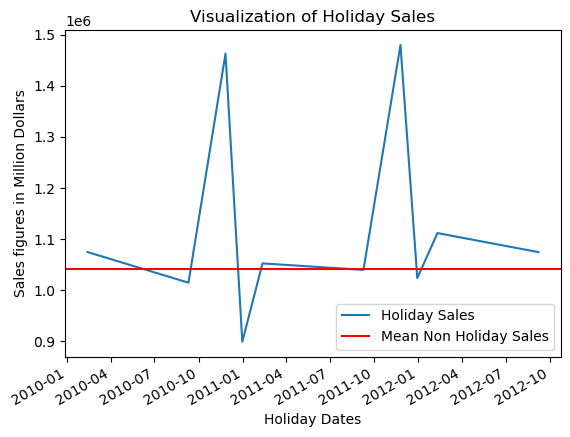

In [30]:
holiday_season_grouped_sales.plot()
plt.axhline(y = mean_non_holiday_sales, color = 'r', linestyle = '-', label = 'Mean Non Holiday Sales') 
plt.title('Visualization of Holiday Sales')
plt.xlabel('Holiday Dates')
plt.ylabel('Sales figures in Million Dollars')
plt.legend()
plt.show()

###### Observations:
By looking at the plot we can conclude that Sales are substantially High on Thanksgiving Holiday weeks. This could be a natural effect of a cultural practice of giving away gifts to relatives and friends.
Super Bowl Holiday weeks also have higher Sales.
In 2012 the Labour Day Holiday week also had a slightly higher Sales trunover than the non holiday weeks, beating the usual trend.

Christmas Holiday Weeks have low sales.

### Task
Provide a monthly and semester view of sales in units and give insights.

In [31]:
# Monthly Sales Data:
walmart_sales_monthly = walmart_sales.groupby(walmart_sales['Date'].dt.to_period('M'))['Weekly_Sales'].sum()
walmart_sales_monthly = pd.DataFrame(walmart_sales_monthly)
walmart_sales_monthly.rename(columns={'Weekly_Sales': 'Monthly Sales'}, inplace=True)
walmart_sales_monthly

,Monthly Sales
Date,
2010-02,1.903330e+08
2010-03,1.819198e+08
2010-04,2.314124e+08
2010-05,1.867109e+08
2010-06,1.922462e+08
2010-07,2.325801e+08
2010-08,1.876401e+08
2010-09,1.772679e+08
2010-10,2.171618e+08


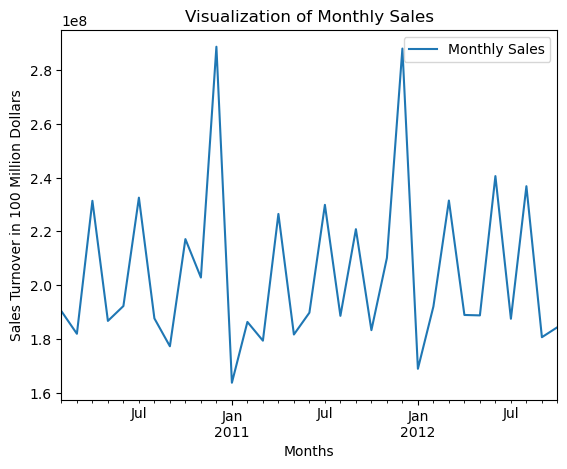

In [158]:
walmart_sales_monthly.plot()
plt.title('Visualization of Monthly Sales')
plt.xlabel('Months')
plt.ylabel('Sales Turnover in 100 Million Dollars')
plt.legend()
plt.show()

#### Insights From Monthly Sales
* Sales Pattern follows a general uptrend from the begining to the end of the year. Sales peaks in December.
* Sales Picks up faster from the month of September to December. 
* The Last Quarter of a year is most productive in terms of sales.
* The Month of January is marked by Lower Sales after the Holiday Season of Thanks Giving and Christmas.
  This is a common phenomenon in all vibrant markets. In India too there is a Sales Lull after festive 
  seasons when most people would have already exhausted their disposable incomes by purchasing different
  kinds of consumer goods during the festive season.

In [159]:
def getSemester(twoQuartersData, idx):
    year = str(twoQuartersData.index[0])[:4]
    if idx%4 == 0:
        semester = 'SEM1'
    else:
        semester = 'SEM2'
    return (year + ' - ' + semester)

In [160]:
# Semester Sales Data:
walmart_sales_quarterly = walmart_sales.groupby(walmart_sales['Date'].dt.to_period('Q'))['Weekly_Sales'].sum()
walmart_sales_quarterly = pd.DataFrame(walmart_sales_quarterly)
walmart_sales_quarterly.rename(columns={'Weekly_Sales': 'Quarterly Sales'}, inplace=True)
data_points = len(walmart_sales_quarterly.index)
semesters = []
turnovers = []
semester_sales_dictionary = {}
for i in range(0, data_points, 2):
    semester = getSemester(walmart_sales_quarterly.iloc[i: i+2], i)
    turnover = walmart_sales_quarterly.iloc[i: i+2]['Quarterly Sales'].sum()
    semesters.append(semester)
    turnovers.append(turnover)
    
semester_sales_dictionary['Semesters'] = semesters
semester_sales_dictionary['Semester Sales Turnover'] = turnovers

semester_sales = pd.DataFrame(semester_sales_dictionary)
semester_sales = semester_sales.set_index('Semesters')
semester_sales

,Semester Sales Turnover
Semesters,
2010 - SEM1,9.826223e+08
2010 - SEM2,1.306264e+09
2011 - SEM1,1.127340e+09
2011 - SEM2,1.320860e+09
2012 - SEM1,1.210765e+09
2012 - SEM2,7.893674e+08


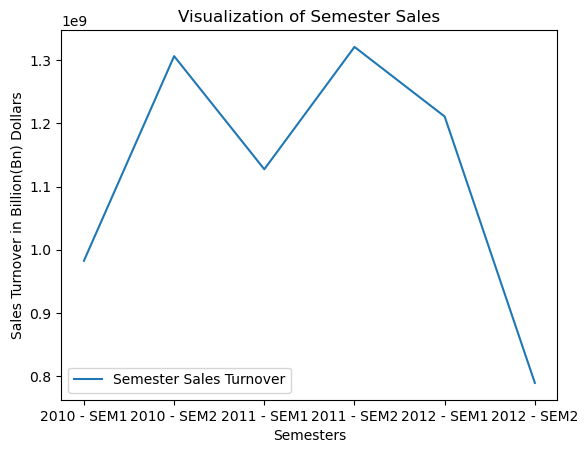

In [161]:
semester_sales.plot()
plt.title('Visualization of Semester Sales')
plt.xlabel('Semesters')
plt.ylabel('Sales Turnover in Billion(Bn) Dollars')
plt.legend()
plt.show()

#### Insights From Semester Sales
* Sales Pattern follows a general uptrend from the First to the Second Semester the year. 
* Sales are more in Second Semester.
* Majority of the Second Semester Sales occur in the Festival - Holiday Season of Thanksgiving and Christmas.
* The SEM2 (Semester - Two) Sales shows less turnover as complete Data is not available.
* It would be better to have a Quarterly Analysis of Sales rather than a Semester Analysis of Sales.


### Statistical Model

#### For Store 1 
    Build prediction models to forecast demand
    Linear Regression – Utilize variables like date and restructure dates as 1 for 5 Feb 2010 
    (starting from the earliest date in order). Hypothesize if CPI, unemployment, and fuel price 
    have any impact on sales.
 - Change dates into days by creating new variable.
 - Select the model which gives best accuracy.

In [162]:
walmart_store1 = walmart_sales[walmart_sales['Store'] == 1]
walmart_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573


In [163]:
walmart_store1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 143 entries, 0 to 142
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         143 non-null    int64         
 1   Date          143 non-null    datetime64[ns]
 2   Weekly_Sales  143 non-null    float64       
 3   Holiday_Flag  143 non-null    int64         
 4   Temperature   143 non-null    float64       
 5   Fuel_Price    143 non-null    float64       
 6   CPI           143 non-null    float64       
 7   Unemployment  143 non-null    float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 10.1 KB


In [164]:
walmart_store1.describe()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,143.0,143,1.430000e+02,143.000000,143.000000,143.000000,143.000000,143.000000
mean,1.0,2011-06-17 00:00:00,1.555264e+06,0.069930,68.306783,3.219699,215.996892,7.610420
min,1.0,2010-02-05 00:00:00,1.316899e+06,0.000000,35.400000,2.514000,210.337426,6.573000
25%,1.0,2010-10-11 12:00:00,1.458105e+06,0.000000,58.265000,2.764500,211.549277,7.348000
50%,1.0,2011-06-17 00:00:00,1.534850e+06,0.000000,69.640000,3.290000,215.459905,7.787000
75%,1.0,2012-02-20 12:00:00,1.614892e+06,0.000000,80.485000,3.594000,220.531330,7.838000
max,1.0,2012-10-26 00:00:00,2.387950e+06,1.000000,91.650000,3.907000,223.444251,8.106000
std,0.0,NaN,1.559808e+05,0.255926,14.250486,0.427313,4.350890,0.383749


In [165]:
walmart_store1.corr()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Date,NaN,1.000000,0.214539,-0.013285,0.154069,0.781789,0.973943,-0.791222
Weekly_Sales,NaN,0.214539,1.000000,0.194905,-0.222701,0.124592,0.225408,-0.097955
Holiday_Flag,NaN,-0.013285,0.194905,1.000000,-0.200543,-0.085903,-0.028919,0.082949
Temperature,NaN,0.154069,-0.222701,-0.200543,1.000000,0.228493,0.118503,-0.180695
Fuel_Price,NaN,0.781789,0.124592,-0.085903,0.228493,1.000000,0.755259,-0.513944
CPI,NaN,0.973943,0.225408,-0.028919,0.118503,0.755259,1.000000,-0.813471
Unemployment,NaN,-0.791222,-0.097955,0.082949,-0.180695,-0.513944,-0.813471,1.000000


## Plotting Weekly_Sales against Holiday_Flag, Temperature, Fuel_Price, CPI and Unemployment

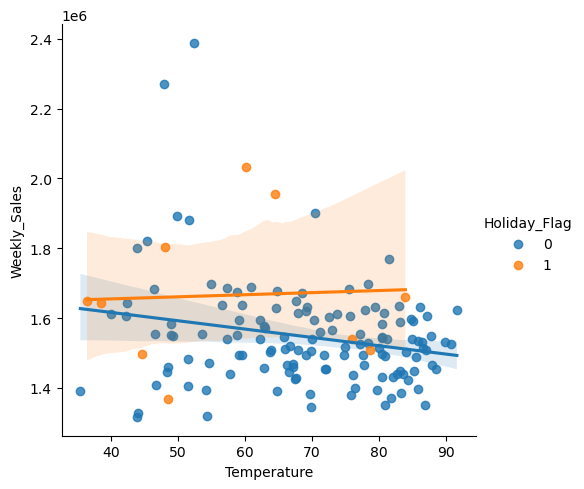

In [166]:
# Make a plot for Sales v/s Temperature
sns.lmplot(data=walmart_store1, x='Temperature', y='Weekly_Sales', hue='Holiday_Flag')
plt.show()

### Observations Sales V/s Temperature Categorized by Holidays
- For Non - Holidays the Sales decreases with increase in Temperature. Mild Negative Correlation.
- For Holidays the Sales increases with increase in Temperature in a marginal way. Marginal Positive Correlation.

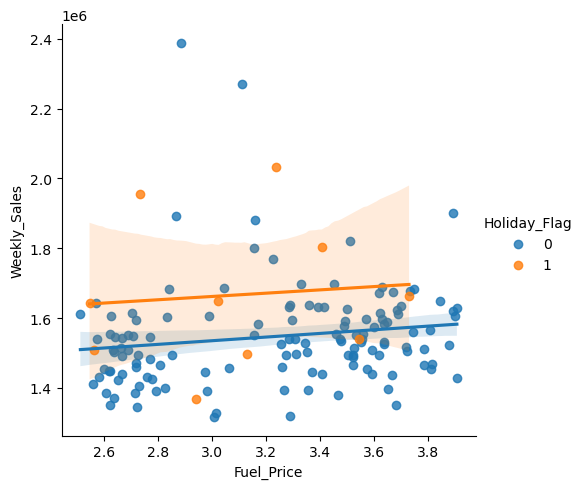

In [167]:
# Make a plot for Sales v/s Fuel Price
sns.lmplot(data=walmart_store1, x='Fuel_Price', y='Weekly_Sales', hue='Holiday_Flag')
plt.show()

### Observations Sales V/s Fuel Price Categorized by Holidays
- For Non - Holidays the Sales increases with increase in Fuel Price. Mild Positive Correlation.
- For Holidays the Sales increases with increase in Fuel Price. Mild Positive Correlation.

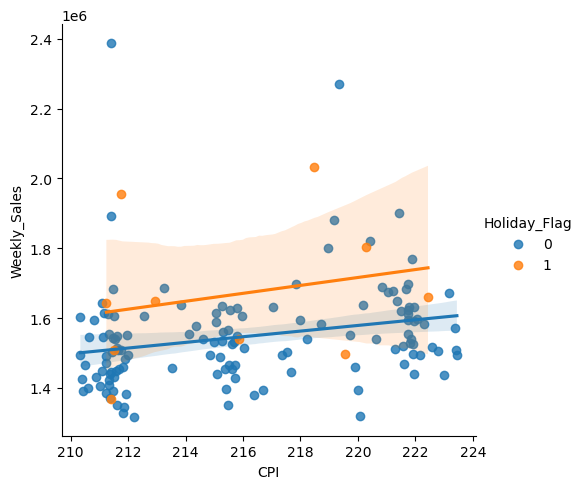

In [168]:
# Make a plot for Sales v/s CPI
sns.lmplot(data=walmart_store1, x='CPI', y='Weekly_Sales', hue='Holiday_Flag')
plt.show()

### Observations Sales V/s CPI Categorized by Holidays
- For Non - Holidays the Sales increases with increase in CPI. Mild Positive Correlation.
- For Holidays the Sales increases with increase in CPI. Mild Positive Correlation.

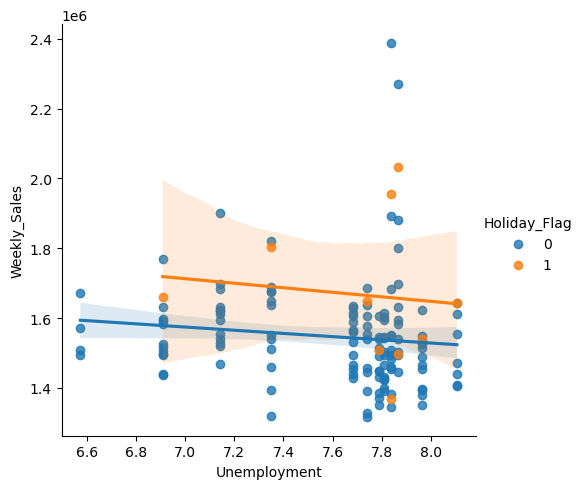

In [169]:
# Make a plot for Sales v/s Unemployment
sns.lmplot(data=walmart_store1, x='Unemployment', y='Weekly_Sales', hue='Holiday_Flag')
plt.show()

### Observations Sales V/s Fuel Price Categorized by Holidays
- For Non - Holidays the Sales decreases with increase in Unemployement. Mild Negative Correlation.
- For Holidays the Sales decreases with increase in Unemployement. Mild Negative Correlation.
- There can be obvious reasons for this as gross disposable (spendable) incomes decrease with increase in Unemployment. 

## Linear Regression

In [170]:
# First we will split the Date column in DAY, MONTH and YEAR.
walmart_store1['Day'] = walmart_store1['Date'].dt.day
walmart_store1['Month'] = walmart_store1['Date'].dt.month
walmart_store1['Year'] = walmart_store1['Date'].dt.year

In [171]:
walmart_store1

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,Day,Month,Year
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106,5,2,2010
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106,12,2,2010
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106,19,2,2010
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106,26,2,2010
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106,5,3,2010
...,...,...,...,...,...,...,...,...,...,...,...
138,1,2012-09-28,1437059.26,0,76.08,3.666,222.981658,6.908,28,9,2012
139,1,2012-10-05,1670785.97,0,68.55,3.617,223.181477,6.573,5,10,2012
140,1,2012-10-12,1573072.81,0,62.99,3.601,223.381296,6.573,12,10,2012
141,1,2012-10-19,1508068.77,0,67.97,3.594,223.425723,6.573,19,10,2012


In [214]:
X = walmart_store1[['Fuel_Price','CPI','Unemployment', 'Day', 'Month', 'Year']]
y = walmart_store1['Weekly_Sales']

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=108)


std_scaler = StandardScaler()
X_train = std_scaler.fit_transform(X_train)
X_test = std_scaler.fit_transform(X_test)

In [215]:
# A Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Accuracy:', lr.score(X_train, y_train)*100)


print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 35.5248100431837
Mean Absolute Error: 106670.75108339108
Mean Squared Error: 39838210489.35526
Root Mean Squared Error: 199595.1163965573


In [216]:
# A Random Forest Regression Model
rf = RandomForestRegressor(n_estimators = 2000, max_depth=20, n_jobs=10, random_state=108)        
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print('Accuracy:', rf.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: 27.547782907891648
Mean Absolute Error: 79497.13325402925
Mean Squared Error: 23878127851.21244
Root Mean Squared Error: 154525.49256097662


In [217]:
# An XGBoost Regression Model

xgb_regressor = xgb.XGBRegressor(objective ='reg:linear', n_estimators=1000, max_depth=10, seed=108)
xgb_regressor.fit(X_train, y_train)

y_pred = xgb_regressor.predict(X_test)

print('Accuracy:', xgb_regressor.score(X_test, y_test)*100)

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('R-squared Score:', metrics.r2_score(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Accuracy: -25.320641312603964
Mean Absolute Error: 94424.15875
Mean Squared Error: 41302011391.23231
R-squared Score: -0.25320641312603964
Root Mean Squared Error: 203228.96297337225


### The LinearRegressor gives best accuracy